# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from multiprocessing import Pool

In [2]:
# guardar informacao de convergencia para cada grupo de amigos
converge_galera = {}
media_galera = {}
desvio_galera = {}
min_galera = {}
max_galera = {}
numero_interacoes = 50

# uma função que testa convergencia para cada grupo de amigos
def jogo(amigos):
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print i,'converge'
                if converge_galera.has_key(amigos):
                    converge_galera[amigos].append(i)
                else:
                    converge_galera[amigos] = [i]
                break
    media_galera[amigos] = int(np.mean(converge_galera[amigos]))
    desvio_galera[amigos] = int(np.std(converge_galera[amigos]))
    min_galera[amigos] = int(np.min(converge_galera[amigos]))
    max_galera[amigos] = int(np.max(converge_galera[amigos]))
    return 

Vamos agora verificar a diferença no tempo se rodarmos o código em série e utilizando paralelismo:

In [3]:
if __name__ == "__main__":
    start = time.time()
    map(jogo, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    print "Tempo em série: %f" % (time.time() - start)


    start = time.time()
    pool = Pool(processes=4)
    pool.map(jogo, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    print "Tempo em paralelo: %f" % (time.time() - start)

Tempo em série: 1.041189
Tempo em paralelo: 0.540836


Agora iremos criar uma tabela, a fim de melhorar a vizualização global dos nosso dados:


In [4]:
dados = {'media' : media_galera,'desvio':desvio_galera,
         'minimo':min_galera,'maximo':max_galera}
tabela = pd.DataFrame(dados,columns=['minimo','media','maximo','desvio'])
print tabela

    minimo  media  maximo  desvio
3        1      1       3       0
4        1      2      10       1
5        1      3      13       2
6        1      5      17       4
7        1      7      38       6
8        1     13      68      14
9        1     29     132      27
10       1     51     348      67
11       1     69     321      68
12       3    195     840     176
13      16    339    1804     344
14      20    647    3903     772
15       1    989    3961     887


Se não quisermos mostrar toda a tabela, mas sim apenas observar o número de colunas ou como está organizada as primeiras linhas da nossa tabela, podemos usar o ".head()"

In [5]:
tabela.head()

,minimo,media,maximo,desvio
3,1,1,3,0
4,1,2,10,1
5,1,3,13,2
6,1,5,17,4
7,1,7,38,6


Se quisermos somar todos os número de uma coluna podemos utilizar "np.sum()"

In [6]:
print "A soma de interacoes medias: %f" %np.sum(media_galera.values())
print "A soma de interacoes minimas: %f" %np.sum(min_galera.values())
print "A soma de interacoes minimas: %f" %np.sum(max_galera.values())

A soma de interacoes medias: 2350.000000
A soma de interacoes minimas: 49.000000
A soma de interacoes minimas: 11458.000000


Podemos criar uma tabela através do seaborn onde podemos evidenciar através do uso de cores, onde estão os valores mais altos da nossa tabela e onde estão os mais baixos. Para isso podemos utilizar o "sns.heatmap()"

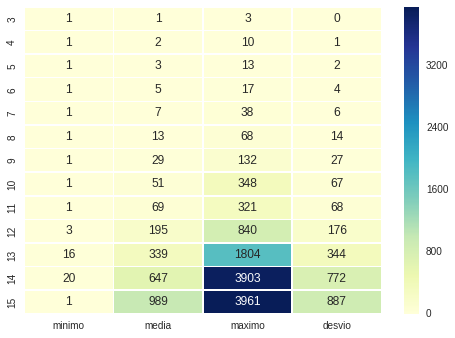

In [7]:
sns.set()
# Draw a heatmap with the numeric values in each cell
sns.heatmap(tabela, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu")

Quando geramos os plots, eles são plotados com as grids automaticamente, assim como outras configurações por default. Pois quando nós utilzamos a biblioteca seaborn, isso é feito automaticamente.

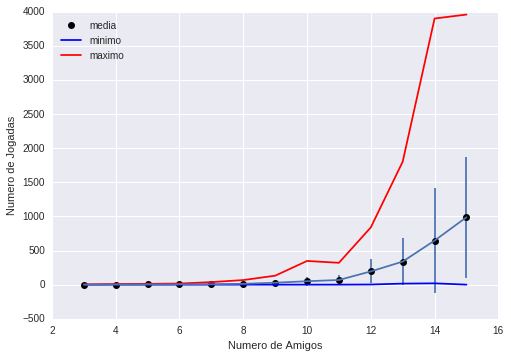

In [8]:
ma, = plt.plot(media_galera.keys(),media_galera.values(),'ko', label='media')
me, = plt.plot(min_galera.keys(),min_galera.values(),'b-',label='minimo')
mi, = plt.plot(max_galera.keys(),max_galera.values(),'r-',label='maximo')
plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())

plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')
plt.legend(handles=[ma,me,mi], loc=2)


É observado que para valores relacionadas ao número de jogadas acima cresce exponencialmente à medida que quescesce o número de amigos. Isso é bem evidente principalmente quando olhamos para o número de interações máximas destacado com a cor vermelha. As barras de erros da média nesta figura são representadas pelas linhas verticais.

Por questão de melhor visualização do plot, podemos colocar o eixo y em logarítmo para observar melhor principalmente o que acontece com o número de jogadas quando temos um número de amigos menor que 9.

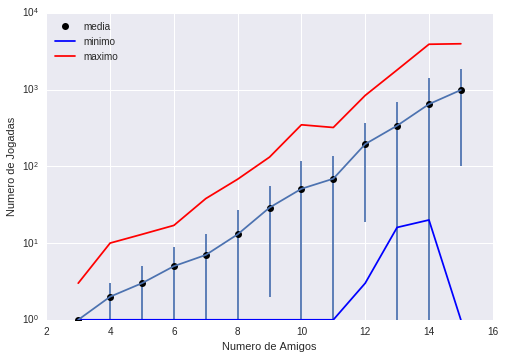

In [9]:
ma, = plt.plot(media_galera.keys(),media_galera.values(),'ko', label='media')
me, = plt.plot(min_galera.keys(),min_galera.values(),'b-',label='minimo')
mi, = plt.plot(max_galera.keys(),max_galera.values(),'r-',label='maximo')
plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())

plt.yscale('log')
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')
plt.legend(handles=[ma,me,mi], loc=2)

Observe que as barras de erros estão maiores agora para valores mais baixos, isto acontece por que o eixo vertical está em log.

Podemos ver que o crescimento da curva vermelha e azul claro parecem ter a mesma inclinação (para este plot que está em log), enquanto a curva em azul escuro só começa a crescer significativamente tardiamente (após 'número de amigos' > 9).

Agora podemos afirmar com uma certeza maior que o erro sobre a média, toca a curva em azul escuro na maioria dos pontos. A curva azul escuro representa o número de jogadas mínimas.

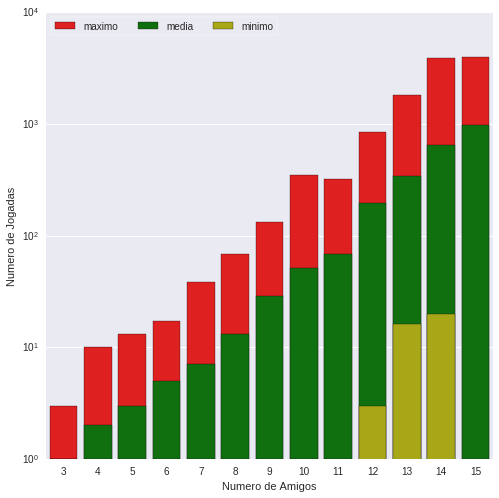

In [10]:
f, (ax1) = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
sns.set(style="darkgrid")

x1 = max_galera.keys()
y1 = max_galera.values()
sns.barplot(x1, y1, ax=ax1, color='r',label="maximo")

x2 = media_galera.keys()
y2 = media_galera.values()
sns.barplot(x2, y2, ax=ax1,color='g',label="media")

x3 = min_galera.keys()
y3 = min_galera.values()
sns.barplot(x3, y3, ax=ax1, color='y',label="minimo")

ax1.legend(ncol=3, loc="upper left", frameon=True)
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')
plt.yscale('log')

Este gráfico de barras é uma outra forma de comparar o crescimento desses três conjuntos de dados: Vermelho, verde e amarelo, que representam no número de jogadas 'máxima', 'média' e 'mínima', respectivamente.

Comparando os crescimentos, observamos que o número médio e máximo de jogadas de jogadas tem um crescimento expressivo desde um grupo muito pequeno de pessoas até um número mais alto. Enquanto que o número mínimo de jogadas somente aparece em um número de amigos alto. 

Vamos criar uma nova tabela com uma unica coluna chamada indices.

In [11]:
index = {3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
dados1 = {'indices' : index}
tabela2 = pd.DataFrame(dados1)
print tabela2

    indices
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15


Agora podemos utilizar o pandas para concatenar nossas duas tabelas e assim criar uma terceira tabela. 

Através de 'pd.concat()'.

In [12]:
tabela3 = pd.concat([tabela, tabela2], axis=1)
print tabela3

    minimo  media  maximo  desvio  indices
3        1      1       3       0        3
4        1      2      10       1        4
5        1      3      13       2        5
6        1      5      17       4        6
7        1      7      38       6        7
8        1     13      68      14        8
9        1     29     132      27        9
10       1     51     348      67       10
11       1     69     321      68       11
12       3    195     840     176       12
13      16    339    1804     344       13
14      20    647    3903     772       14
15       1    989    3961     887       15


Fizemos esta concatenação para que possamos gerar uma regreessão linear dos nossos dados. Para isso iremos utilizar a coluna 'indices'.

Para a reta de regressão utilizaremos 'sns.lmplot()'

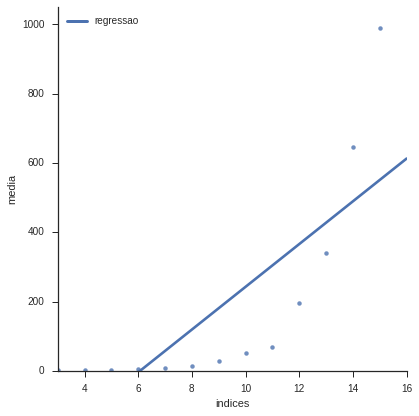

In [13]:
sns.set(style="ticks")
sns.lmplot(x="indices", y="media",data=tabela3,size=6,ci=None)

Md, = plt.plot([], label="regressao", linewidth=3)

plt.axis([3, 16, 0, 1050])
plt.legend(loc=2)

Como era esperado, a regressão não se ajusta bem sobre os nossos dados.

Podemos tentar uma curva exponencial.

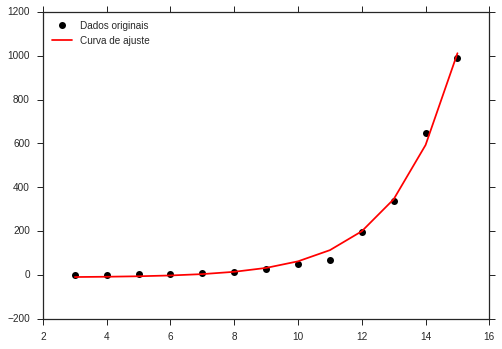

In [14]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c


x = np.linspace(0,4,13)
y = media_galera.values()
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

sns.set(style="ticks")

plt.plot(index.keys(), media_galera.values(), 'ko', label="Dados originais")
plt.plot(index.keys(), func(x, *popt), 'r-', label="Curva de ajuste")

plt.legend(loc=2)
plt.show()

Como ja era esperado o ajuste exponencial se ajustou melhor aos dados. Mostrando que o crescimento de um jogo de Zerinho ou Um cresce exponencialmente à medida que aumenta o número de amigos. 

E ainda, esse crescimento tende a ter maior número de interações em média 